In [1]:
import numpy as np
import matplotlib.pyplot as plt
# sử dụng numpy

[1 2 3 4 5 6 7]


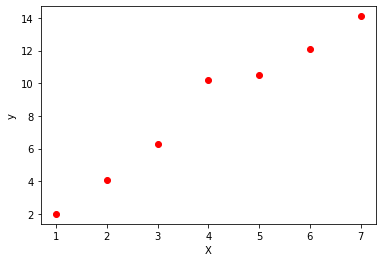

In [2]:
X=np.array([[1,2,3,4,5,6,7]])
y=np.array([2,4.1,6.3,10.2,10.5,12.1,14.1])
print(X[0])
plt.plot(X[0],y,'ro')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [3]:
print(X.shape)
print(X.shape[1])
one = np.ones((X.shape[1], 1))
print(one)
print(X.T) 
X = np.concatenate((one,X.T), axis=1)
print(X) 

(1, 7)
7
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]]


In [15]:
w = np.array([[1]*X.shape[1]])
w = w.T
#print(w)
print(X.shape)
print(w.shape)
print(np.dot(X,w))

(7, 2)
(2, 1)
[[2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]]


In [16]:
def f(X,w):
    return np.dot(X,w)
print(f(X,w))

[[2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]]


In [17]:
# xây dựng một hàm loss mới
print(y)
y1 = f(X,w)
print(y1)
m = y-y1.T
print(m)
L = np.dot(m,m.T)/(2*X.shape[0])
print(L)

[ 2.   4.1  6.3 10.2 10.5 12.1 14.1]
[[2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]]
[[0.  1.1 2.3 5.2 4.5 5.1 6.1]]
[[8.35785714]]


In [18]:
def loss(X,y,w):
    y1 = f(X,w)
    m = y-y1.T
    L = np.dot(m,m.T)/(2*X.shape[0])
    return L[0][0]
print(X)
print(y)
print(w)
print(loss(X,y,w))

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]]
[ 2.   4.1  6.3 10.2 10.5 12.1 14.1]
[[1]
 [1]]
8.35785714285714


In [25]:
z = f(X,w).T[0]

print(z.shape)
print(z)
print(y)
z = z-y
print(z.shape)
print(X.shape)
print(np.dot(z,X))

(7,)
[2. 3. 4. 5. 6. 7. 8.]
[ 2.   4.1  6.3 10.2 10.5 12.1 14.1]
(7,)
(7, 2)
[ -24.3 -125.7]


In [30]:
# tính đạo hàm tại điểm w[i]
def derivative(X,y,w):
    z = f(X,w).T[0]
    z = z-y
    return np.dot(z,X)
print(derivative(X,y,w))

[-15.795 -84.876]


In [36]:
# update weights w 
w = np.array([[1]*X.shape[1]])
w = w.T
print(w)
learning_rate = 0.01
d = derivative(X,y,w)
d = d*learning_rate 
print(d)
w1 = w.T[0]
print(w1)
w1 = w1-d
print(w1)
w = np.array([w1]).T
print(w)

[[1]
 [1]]
[-0.243 -1.257]
[1 1]
[1.243 2.257]
[[1.243]
 [2.257]]


In [38]:
# update weights w 
w = np.array([[1]*X.shape[1]])
w = w.T
print(w)
learning_rate = 0.01
def update_weights(X,y,w,learning_rate):
    # tính đạo hàm
    d = derivative(X,y,w)
    d = d*learning_rate 
    w1 = w.T[0]-d
    return np.array([w1]).T
    
w = update_weights(X,y,w,learning_rate)
print(w)

[[1]
 [1]]
[[1.243]
 [2.257]]


In [49]:
x0 = np.linspace(start=1, stop=10, num=10)
x0 = np.array([x0]).T
print(x0.shape)
one = np.ones((x0.shape[0], 1))
x0 = np.concatenate((one,x0), axis=1)
print(x0)
z = np.dot(x0,w[:2])
print(z)
y0 = z.T[0]
print(y0)

(10, 1)
[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[[ 3.5  ]
 [ 5.757]
 [ 8.014]
 [10.271]
 [12.528]
 [14.785]
 [17.042]
 [19.299]
 [21.556]
 [23.813]]
[ 3.5    5.757  8.014 10.271 12.528 14.785 17.042 19.299 21.556 23.813]


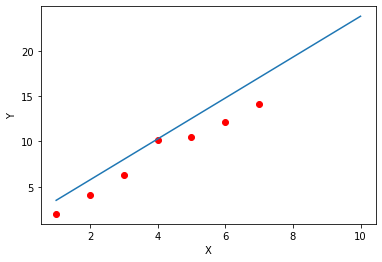

In [54]:
# check
plt.plot(X.T[1],y,'ro')
plt.xlabel('X')
plt.ylabel('Y')
#x0 = np.linspace(start=1, stop=10, num=50)
#y0 = w[0]+w[1]*x0
x1 = np.linspace(start=1, stop=10, num=50)
x0 = np.array([x1]).T
one = np.ones((x0.shape[0], 1))
x0 = np.concatenate((one,x0), axis=1)
z = np.dot(x0,w[:2])
y0 = z.T[0]
plt.plot(x1,y0)
plt.show()


In [368]:
# check
print(X)
print(y)
print(w)
L = loss(X,y,w)
print(L) 

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]]
[ 2.   4.1  6.3 10.2 10.5 12.1 14.1]
[[1.]
 [1.]]
8.35785714285714


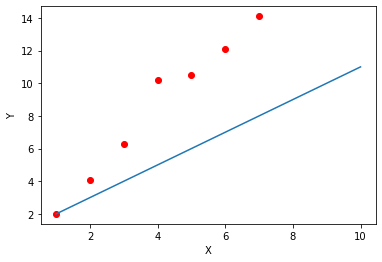

epoch_ 0 :
8.35785714285714  :  0


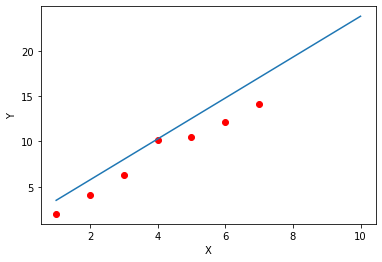

epoch_ 1 :
1.9939899285714269  :  8.35785714285714


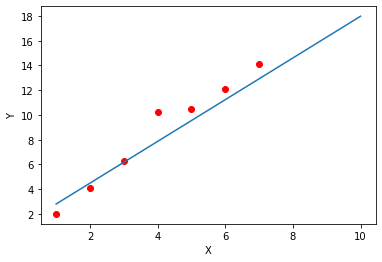

epoch_ 2 :
0.6663313999357137  :  1.9939899285714269


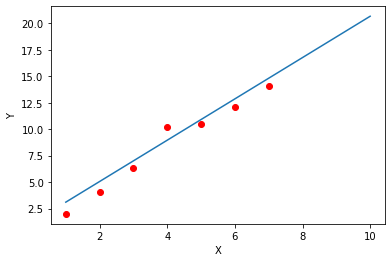

epoch_ 3 :
0.3884124379556449  :  0.6663313999357137


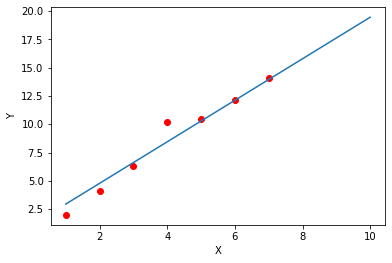

epoch_ 4 :
0.32932462212820274  :  0.3884124379556449


In [369]:
# training 
epoch = 10
los_old = 0
for i in range(epoch):  
    # hiển thị đồ thị 
    plt.plot(X.T[1],y,'ro')
    plt.xlabel('X')
    plt.ylabel('Y')
    x0 = np.linspace(start=1, stop=10, num=50)
    y0 = w[0]+w[1]*x0
    plt.plot(x0,y0)
    plt.show()
    
    # cập nhật tham số 
    L = loss(X,y,w)
    print('epoch_',i,':')
    print(L,' : ',los_old)
    if los>(los_old-0.0001) and i>0:
        break
    los_old = L
    # cập nhật 
    w = update_weights(X,y,w,learning_rate)
    
    
    